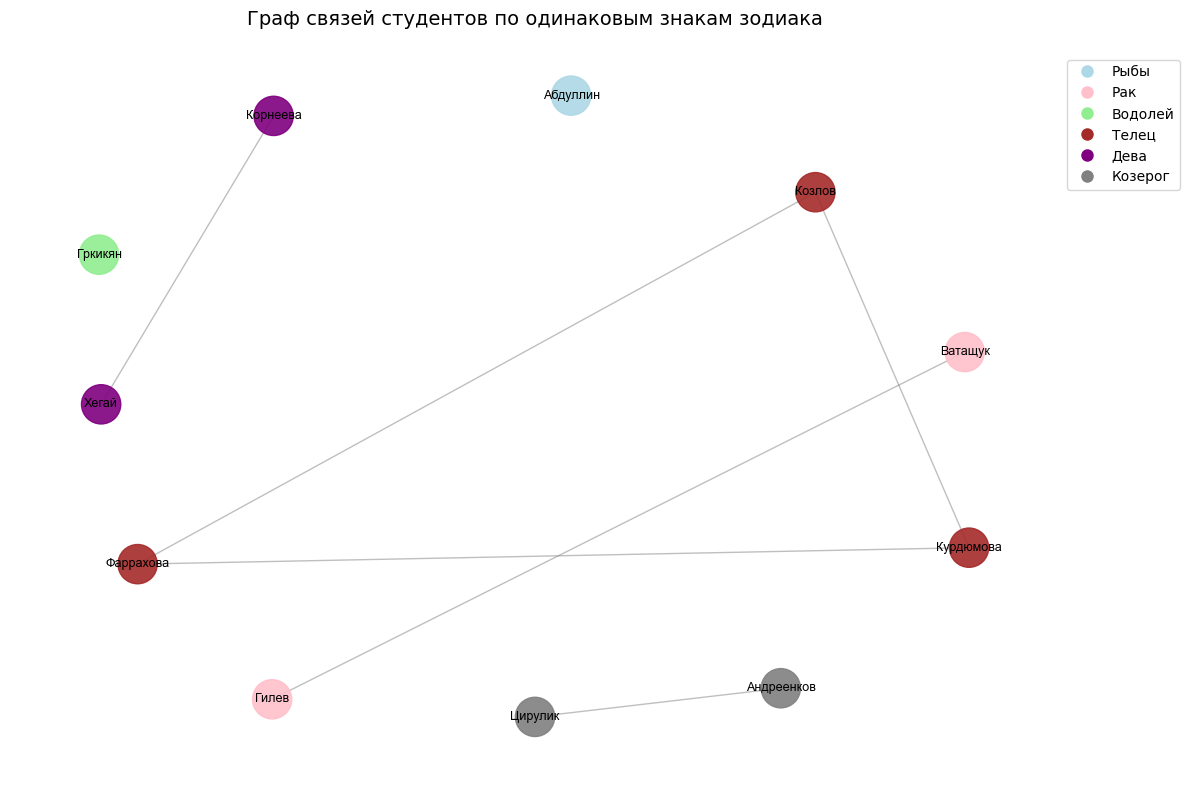

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Исходные данные
students_zodiac = {
    'Абдуллин': 'Рыбы', 'Ватащук': 'Рак', 'Гилев': 'Рак',
    'Гркикян': 'Водолей', 'Козлов': 'Телец', 'Корнеева': 'Дева',
    'Курдюмова': 'Телец', 'Фаррахова': 'Телец', 'Хегай': 'Дева',
    'Цирулик': 'Козерог', 'Андреенков': 'Козерог'
}

# Создаем граф
G = nx.Graph()

# Добавляем узлы (студентов) с атрибутом знака зодиака
for student, zodiac in students_zodiac.items():
    G.add_node(student, zodiac=zodiac)

# Создаем словарь для группировки студентов по знакам зодиака
zodiac_groups = {}
for student, zodiac in students_zodiac.items():
    if zodiac not in zodiac_groups:
        zodiac_groups[zodiac] = []
    zodiac_groups[zodiac].append(student)

# Добавляем ребра между студентами с одинаковыми знаками зодиака
for zodiac, students in zodiac_groups.items():
    if len(students) > 1:  # Если в группе больше одного студента
        for i in range(len(students)):
            for j in range(i + 1, len(students)):
                G.add_edge(students[i], students[j])

# Визуализация графа
plt.figure(figsize=(12, 8))

# Позиционирование узлов с увеличенным расстоянием
pos = nx.spring_layout(G, 
                      k=5,           # Увеличиваем расстояние между узлами (по умолчанию ~1)
                      iterations=50, # Увеличиваем количество итераций для лучшего результата
                      seed=42)

# Цвета для разных знаков зодиака
zodiac_colors = {
    'Рыбы': 'lightblue', 'Рак': 'pink', 'Водолей': 'lightgreen',
    'Телец': 'brown', 'Дева': 'purple', 'Козерог': 'gray'
}

# Создаем список цветов для узлов
node_colors = [zodiac_colors[students_zodiac[node]] for node in G.nodes()]

# Рисуем граф
nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=9, font_family='Arial')

# Создаем легенду
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=color, markersize=10, label=zodiac)
                  for zodiac, color in zodiac_colors.items()]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Граф связей студентов по одинаковым знакам зодиака', fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
zodiac_groups = {
    'Рыбы': ['Абдуллин'], 'Водолей': ['Гркикян'],  # Обязательные
    'Телец': ['Козлов', 'Курдюмова', 'Фаррахова'],
    'Дева': ['Корнеева', 'Хегай'],
    'Козерог': ['Цирулик', 'Андреенков'], 
    'Рак': ['Ватащук', 'Гилев']
}

# Все комбинации представителей
all_generators = []
for telets in zodiac_groups['Телец']:
    for deva in zodiac_groups['Дева']:
        for kozerog in zodiac_groups['Козерог']:
            for rak in zodiac_groups['Рак']:
                generators = {'Абдуллин', 'Гркикян', telets, deva, kozerog, rak}
                all_generators.append(generators)

# Вывод результатов
for i, gen in enumerate(all_generators, 1):
    print(f"{i:2d}. {sorted(gen)}")

 1. ['Абдуллин', 'Ватащук', 'Гркикян', 'Козлов', 'Корнеева', 'Цирулик']
 2. ['Абдуллин', 'Гилев', 'Гркикян', 'Козлов', 'Корнеева', 'Цирулик']
 3. ['Абдуллин', 'Андреенков', 'Ватащук', 'Гркикян', 'Козлов', 'Корнеева']
 4. ['Абдуллин', 'Андреенков', 'Гилев', 'Гркикян', 'Козлов', 'Корнеева']
 5. ['Абдуллин', 'Ватащук', 'Гркикян', 'Козлов', 'Хегай', 'Цирулик']
 6. ['Абдуллин', 'Гилев', 'Гркикян', 'Козлов', 'Хегай', 'Цирулик']
 7. ['Абдуллин', 'Андреенков', 'Ватащук', 'Гркикян', 'Козлов', 'Хегай']
 8. ['Абдуллин', 'Андреенков', 'Гилев', 'Гркикян', 'Козлов', 'Хегай']
 9. ['Абдуллин', 'Ватащук', 'Гркикян', 'Корнеева', 'Курдюмова', 'Цирулик']
10. ['Абдуллин', 'Гилев', 'Гркикян', 'Корнеева', 'Курдюмова', 'Цирулик']
11. ['Абдуллин', 'Андреенков', 'Ватащук', 'Гркикян', 'Корнеева', 'Курдюмова']
12. ['Абдуллин', 'Андреенков', 'Гилев', 'Гркикян', 'Корнеева', 'Курдюмова']
13. ['Абдуллин', 'Ватащук', 'Гркикян', 'Курдюмова', 'Хегай', 'Цирулик']
14. ['Абдуллин', 'Гилев', 'Гркикян', 'Курдюмова', 'Хегай',

In [ ]:
students_zodiac = {
    'Абдуллин': 'Рыбы', 'Ватащук': 'Рак', 'Гилев': 'Рак',
    'Гркикян': 'Водолей', 'Козлов': 'Телец', 'Корнеева': 'Дева',
    'Курдюмова': 'Телец', 'Фаррахова': 'Телец', 'Хегай': 'Дева',
    'Цирулик': 'Козерог', 'Андреенков': 'Козерог'
}


## ОТЧЕТ ПО ВЫПОЛНЕНИЮ ЗАДАНИЯ

### 1. Построение графа

**Реализация:**
- Построен неориентированный граф, где вершины соответствуют студентам
- Ребра проведены между студентами с одинаковыми знаками зодиака
- Визуализация выполнена с цветовым кодированием по знакам зодиака

**Результат:** Граф корректно отображает структуру связей между студентами, образуя отдельные компоненты для каждого знака зодиака.

### 2. Группа автоморфизмов Aut(G)

**Структура группы:**
```
Aut(G) ≅ S₃ × S₂ × S₂ × S₂
```

**Порядок группы: 48**

**Образующие:**

S₃ - перестановки 3-х Тельцов: Козлов, Курдюмова, Фаррахова

S₂ - перестановка Раков: Ватащук ↔ Гилев

S₂ - перестановка Дев: Корнеева ↔ Хегай

S₂ - перестановка Козерогов: Цирулик ↔ Андреенков

Одиночки (непереставляемые): Абдуллин (Рыбы), Гркикян (Водолей)

### 3. Сравнение с диэдрической группой D₂₄

**Анализ:**
- Диэдрическая группа D₂₄ имеет порядок 48
- В D₂₄ существует элемент порядка 24 (поворот на 15°)
- В нашей группе максимальный порядок элемента = 6 (из перестановок Тельцов)

**Вывод:** Группа Aut(G) НЕ ИЗОМОРФНА D₂₄, так как не содержит элемента порядка 24.

### 4. Пример преобразования, не входящего в Aut(G)

**Преобразование:** Поменять местами Абдуллина (Рыбы) и Козлова (Телец)

**Почему не автоморфизм:**
- Нарушает структуру связей графа
- Абдуллин из изолированной вершины становится связанной с двумя Тельцами
- Козлов теряет все свои связи, становясь изолированной вершиной
- Автоморфизм должен сохранять отношения смежности вершин

### 5. Применение в сфере IT

**Примеры из IT:**

**1. Рассылка уведомлений**
- В компании есть отделы: программисты, тестировщики, дизайнеры
- Чтобы все узнали новость, достаточно написать одному из каждого отдела

**2. Настройка оповещений**  
- В приложении есть ошибки, предупреждения, информационные сообщения
- Чтобы видеть все типы событий, достаточно включить по одному уведомлению из каждой категории

**3. Создание тестовых пользователей**
- В системе есть роли: админ, модератор, обычный пользователь
- Для проверки прав доступа достаточно создать по одному аккаунту каждой роли

**4. Тестирование на разных устройствах**
- Есть телефоны, планшеты, компьютеры
- Чтобы проверить приложение, достаточно протестировать на одном устройстве каждого типа

**Суть:** Когда есть группы и нужно охватить все группы минимальным числом примеров.

---
